## Harshal Dupare | 18MA20015 

Consider the attached dataset about advertising and sales. The attributes denote the 
investments on advertising in TV, radio etc and the target variable is the total sales. The aim 
is to predict the sales from the investments on advertising.
Randomly divide the dataset into training (75%) and testing (25%) subsets.

1. Using ridge regression with different values of lambda (0.5, 1, 5, 10, 50, 100) plot the 
coefficients against each other, and also compare the test set mean squared errors.
2. Use the library function of "LASSO regression" to find out which of the 3 features is most 
important, i.e. whose coefficient is furthest from 0. [3 + 2 = 5 marks]

Download the MNIST handwritten digit dataset. It contains 28X28 images from 10 classes (0-
9). Flatten them into 784-dimensional binary vectors. Keep aside 20% data for testing. Use 
perceptron algorithm to classify the images as 0,1,…,9 using i) one-vs-one ii) one-vs-all 
approach. [5 + 5 =10 marks]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from keras.datasets import mnist
import copy 
import seaborn as sn

In [2]:
df = pd.read_csv("data-for-assignment6.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [4]:
X,y = np.array(df.iloc[:,1:4]),np.array(df.iloc[:,4])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(150, 3) (150,) (50, 3) (50,)


In [5]:
# fitting the data on the model

ridge_regression=Ridge(0.5,normalize=True)
ridge_regression.fit(X_train, y_train)
print(ridge_regression.coef_)

[0.03207249 0.12292557 0.01415909]


In [6]:
# testing on a example

ridge_regression.predict(np.array([[180.8,10.8,58.4]]))

array([14.06937827])

In [7]:
# list of values of lambda
max_lmb = 200
min_lmb = 0.01
N = max_lmb/min_lmb
lambd = min_lmb*(np.arange(N)+1)
markers_on = ((np.array([0.5, 1, 5, 10, 50, 100])/min_lmb)-1).astype(np.int32)

# creating list of coefficients for different values of 
# lambda which includes 0.5, 1, 5, 10, 50, 100

coeff = [[],[],[]]
mse_on_test = []
for lmb in lambd:
    ridge_regression=Ridge(lmb,normalize=True)
    ridge_regression.fit(X_train, y_train)
    coeff[0].append(ridge_regression.coef_[0])
    coeff[1].append(ridge_regression.coef_[1])
    coeff[2].append(ridge_regression.coef_[2])
    mse_on_test.append(mean_squared_error(ridge_regression.predict(X_test),y_test))

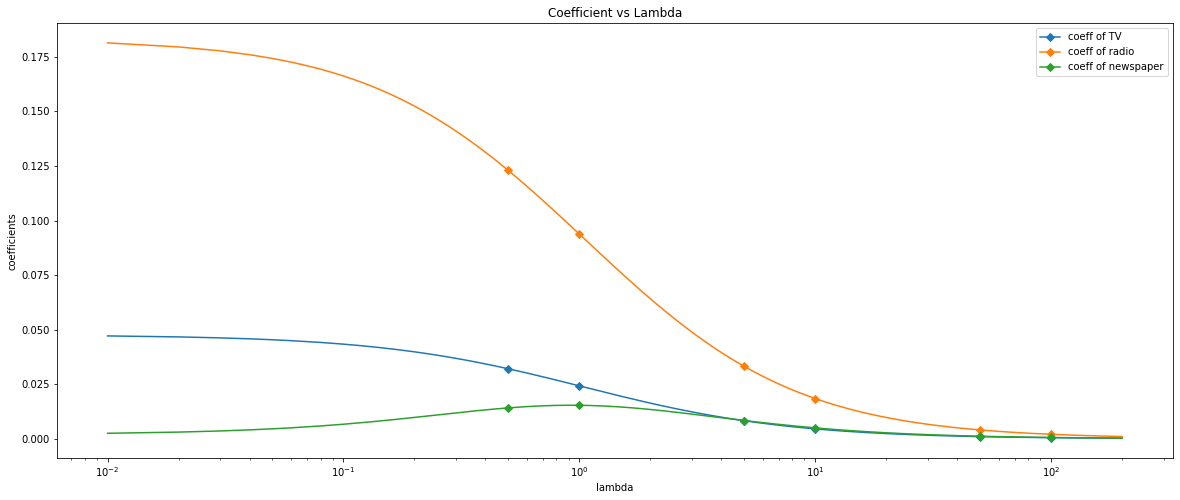

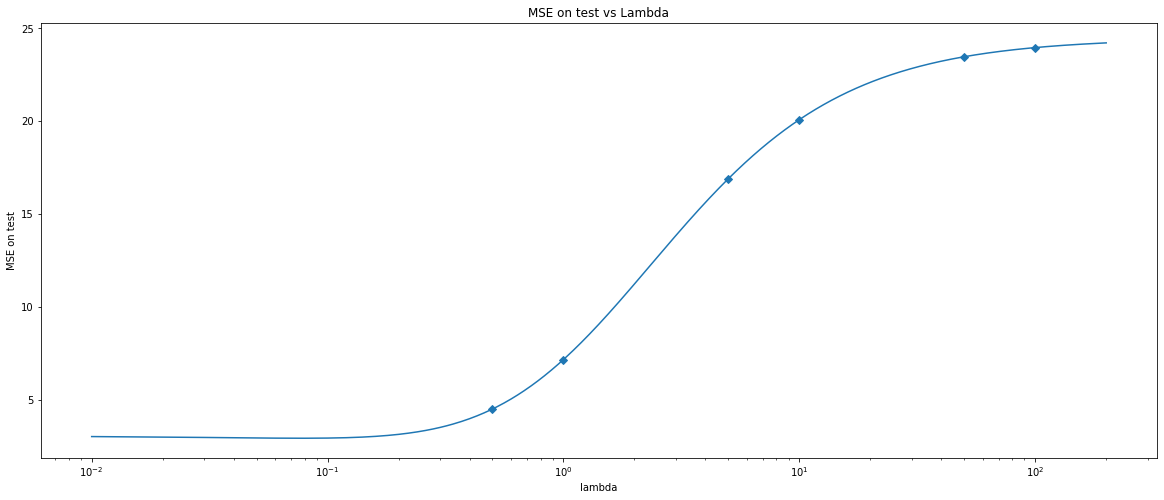

In [8]:
# marked points are the points asked i.e [0.5, 1, 5, 10, 50, 100]

plt.figure(figsize=(20,8))
plt.plot(lambd, coeff[0],'-D',label='coeff of TV',markevery=markers_on)
plt.plot(lambd, coeff[1],'-D',label='coeff of radio',markevery=markers_on)
plt.plot(lambd, coeff[2],'-D',label='coeff of newspaper',markevery=markers_on)
plt.xscale("log")
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Coefficient vs Lambda')
plt.legend()
plt.show()

plt.figure(figsize=(20,8))
plt.plot(lambd, mse_on_test,'-D',markevery=markers_on)
plt.xscale("log")
plt.xlabel('lambda')
plt.ylabel('MSE on test')
plt.title('MSE on test vs Lambda')
plt.show()

## Inference

* We can observe that as we increase the $\lambda$ the loss increases and values of coefficients decreases

## For Lasso

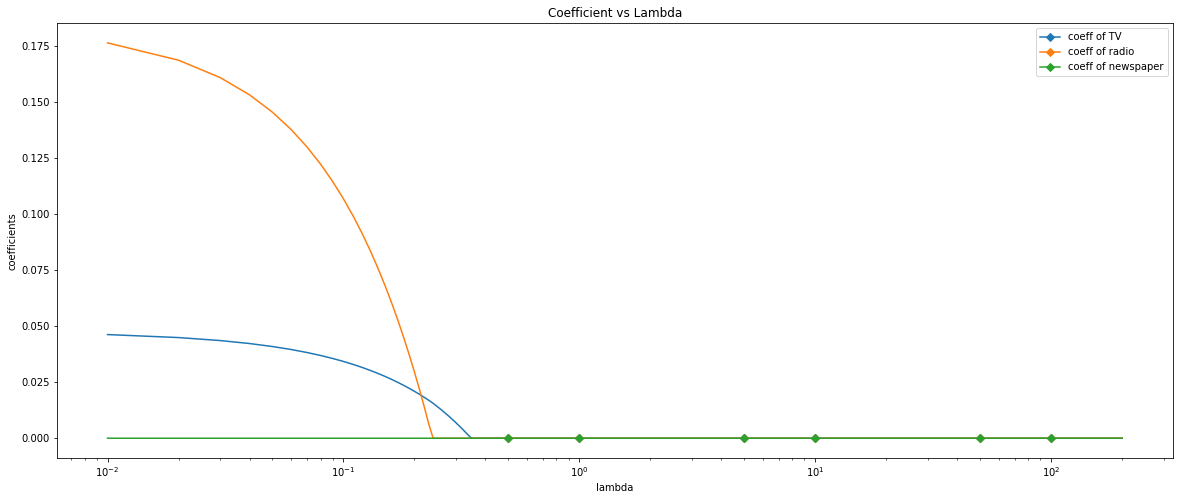

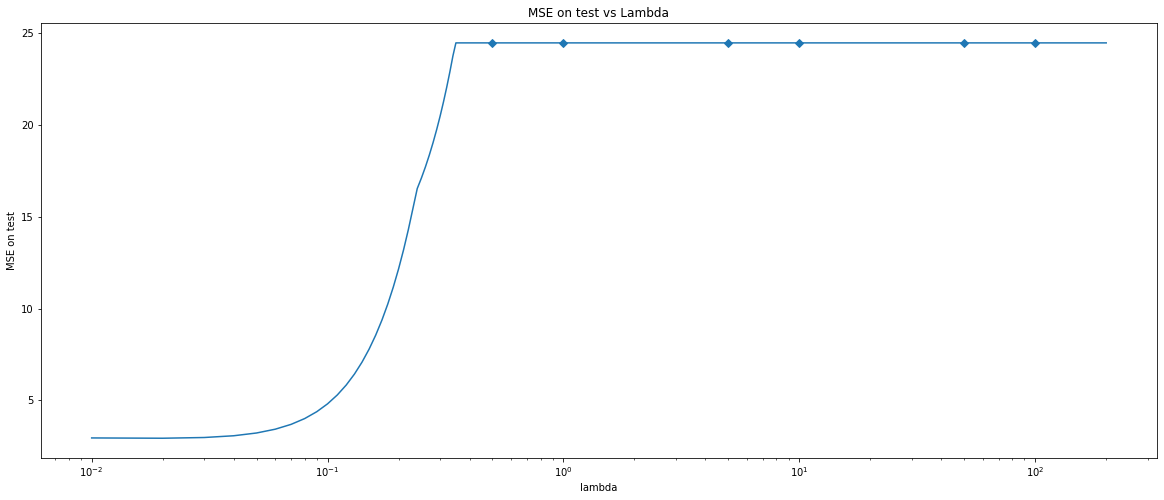

In [9]:
coeff = [[],[],[]]
mse_on_test = []
for lmb in lambd:
    lasso_regression=Lasso(lmb,normalize=True)
    lasso_regression.fit(X_train, y_train)
    coeff[0].append(lasso_regression.coef_[0])
    coeff[1].append(lasso_regression.coef_[1])
    coeff[2].append(lasso_regression.coef_[2])
    mse_on_test.append(mean_squared_error(lasso_regression.predict(X_test),y_test))
    
# marked points are the points asked i.e [0.5, 1, 5, 10, 50, 100]

plt.figure(figsize=(20,8))
plt.plot(lambd, coeff[0],'-D',label='coeff of TV',markevery=markers_on)
plt.plot(lambd, coeff[1],'-D',label='coeff of radio',markevery=markers_on)
plt.plot(lambd, coeff[2],'-D',label='coeff of newspaper',markevery=markers_on)
plt.xscale("log")
plt.xlabel('lambda')
plt.ylabel('coefficients')
plt.title('Coefficient vs Lambda')
plt.legend()
plt.show()

plt.figure(figsize=(20,8))
plt.plot(lambd, mse_on_test,'-D',markevery=markers_on)
plt.xscale("log")
plt.xlabel('lambda')
plt.ylabel('MSE on test')
plt.title('MSE on test vs Lambda')
plt.show()

### Observation on which is the most significant Feature
* For most of the region of $\lambda$, `radio` has the maximum magnitude hence it is most significant feature

## MNIST dataset

In [10]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
print('X_train:'+str(X_train.shape))
print('y_train:'+str(y_train.shape))
print('X_test:'+str(X_test.shape))
print('y_test:'+str(y_test.shape))

X_train:(60000, 28, 28)
y_train:(60000,)
X_test:(10000, 28, 28)
y_test:(10000,)


In [12]:
y = np.concatenate((y_test,y_train))
X = np.concatenate((X_test,X_train))

0


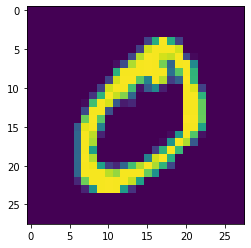

In [13]:
id = 10001
plt.imshow(X[id])
print(y[id])

In [14]:
# reshaping the images
X = X.reshape(70000,-1)
X.shape

(70000, 784)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(56000, 784) (56000,) (14000, 784) (14000,)


## One Vs One

In [16]:

# note y_train must have classes numbered from [0....n-1] for n classes

class OneVsOneClassifier(object):
    def __init__(self,_n,_BinaryClassifier,_X_train,_y_train,**kwargs):
        self.n = _n
        self.BinaryClassifier = _BinaryClassifier
        self.base_X_train = _X_train
        self.base_y_train = _y_train
        self.one_vs_one_model = {}
        
        # initilize the n*(n-1)/2 models
        for i in range(self.n):
            self.one_vs_one_model[i] = {}
            for j in range(i+1,self.n):
                self.one_vs_one_model[i][j]=(self.BinaryClassifier(**kwargs))
                
    def fit(self):
        for i in range(self.n):
            for j in range(i+1,self.n):
                # select only relevent data for each model and fit
                cX_train = self.base_X_train[(self.base_y_train==i) + (self.base_y_train==j)]
                cy_train = self.base_y_train[(self.base_y_train==i) + (self.base_y_train==j)]
                cy_train[cy_train==i] = 0
                cy_train[cy_train==j] = 1
                self.one_vs_one_model[i][j].fit(cX_train,cy_train)
                
    def predict(self,Xp):
        class_vote = np.zeros((Xp.shape[0],self.n))
        for i in range(self.n):
            for j in range(i+1,self.n):
                # predict in 1-0 form
                yp=self.one_vs_one_model[i][j].predict(Xp)
                
                # translate back to class-ids
                yp[yp==1]=j
                yp[yp==0]=i
                
                # accumulate the vote for each test case
                for k in range(yp.shape[0]):
                    class_vote[k][yp[k]]+=1
                    
        # return argmax
        return np.argmax(class_vote,axis=1)

In [17]:
# get the model object

ovo = OneVsOneClassifier(10,Perceptron,X_train,y_train)

In [18]:
# fit model to data

ovo.fit()

In [19]:
# get predection on test set

y_pred=ovo.predict(X_test)

In [20]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1358
           1       0.94      0.99      0.96      1559
           2       0.93      0.89      0.91      1421
           3       0.87      0.89      0.88      1452
           4       0.92      0.94      0.93      1371
           5       0.92      0.84      0.88      1286
           6       0.97      0.93      0.95      1416
           7       0.93      0.95      0.94      1453
           8       0.85      0.91      0.88      1324
           9       0.92      0.89      0.90      1360

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



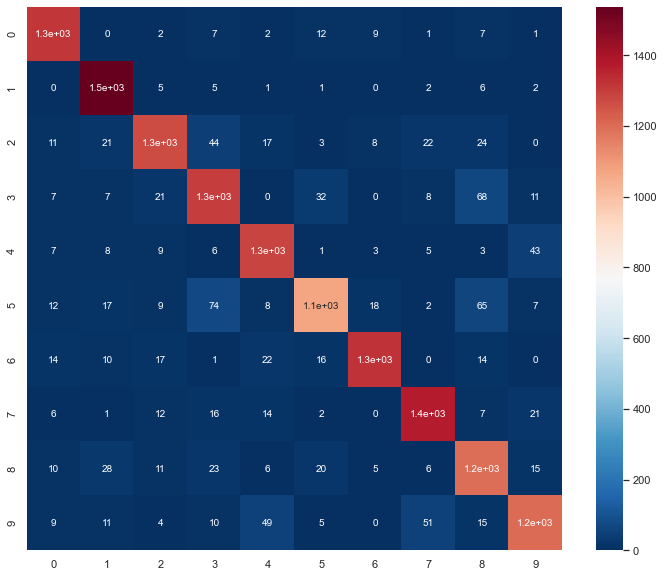

In [21]:
# confusion matrix

plt.figure(figsize=(12,10))
sn.set(font_scale=1)
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='RdBu_r', annot_kws={"size": 10})
plt.show()

## Observations

* Sometimes model get confused between these pairs (5,3), (7,9), (3,8), (5,8), (4,9) all these cases are quite reasonable as they do look similar

## One Vs All

In [22]:

# note y_train must have classes numbered from [0....n-1] for n classes

class OneVsAllClassifier(object):
    def __init__(self,_n,_BinaryClassifier,_X_train,_y_train,**kwargs):
        self.n = _n
        self.BinaryClassifier = _BinaryClassifier
        self.base_X_train = _X_train
        self.base_y_train = _y_train
        self.one_vs_all_model = {}
        for i in range(self.n):
            self.one_vs_all_model[i] = (self.BinaryClassifier(**kwargs))
        
    def fit(self):
        for i in range(self.n):
            cX_train = self.base_X_train
            cy_train = copy.deepcopy(self.base_y_train) - i + 1
            cy_train[cy_train!=1] = 0
            self.one_vs_all_model[i].fit(cX_train,cy_train)
                
    def predict(self,Xp):
        class_vote = np.zeros((Xp.shape[0],self.n))
        for i in range(self.n):
            yp=self.one_vs_all_model[i].decision_function(Xp)
            
            # if default calss is all then flip the score
            if self.one_vs_all_model[i].classes_[1] == 0:
                yp=(-1)*yp
                
            # if it has positive vote for the class then assign it that 
            for k in range(yp.shape[0]):
                if yp[k] > 0:
                    class_vote[k][i]=yp[k]
        
        # return argmax of probabilities ( scores )
        return np.argmax(class_vote,axis=1)

In [23]:
# get the model object

ova = OneVsAllClassifier(10,Perceptron,X_train,y_train)

In [24]:
# fit model to data

ova.fit()

In [25]:
# get predection on test set

y_pred=ova.predict(X_test)

In [26]:
# classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.98      0.60      1358
           1       0.99      0.85      0.92      1559
           2       0.89      0.89      0.89      1421
           3       0.96      0.70      0.81      1452
           4       0.81      0.94      0.87      1371
           5       0.82      0.80      0.81      1286
           6       0.98      0.87      0.92      1416
           7       0.97      0.82      0.89      1453
           8       0.90      0.21      0.34      1324
           9       0.78      0.87      0.82      1360

    accuracy                           0.80     14000
   macro avg       0.85      0.79      0.79     14000
weighted avg       0.86      0.80      0.79     14000



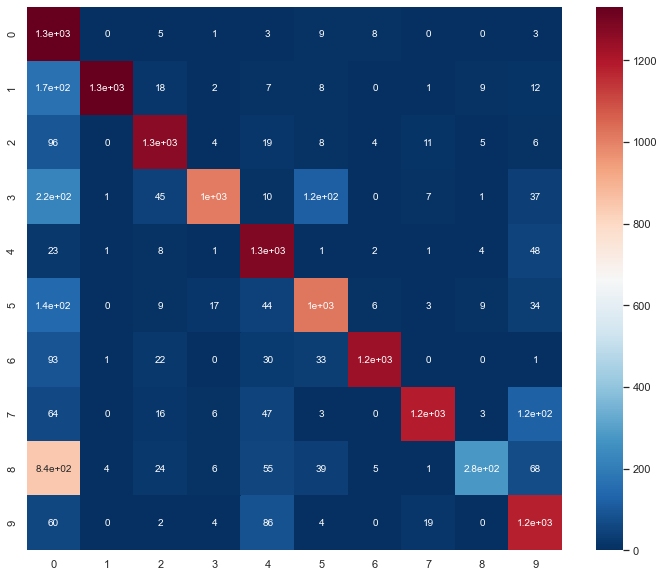

In [27]:
# confusion matrix

plt.figure(figsize=(12,10))
sn.set(font_scale=1)
sn.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='RdBu_r', annot_kws={"size": 10})
plt.show()